<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Conjugacy, Beta-Binomial Model, Maximum Likelihood

_Authors: Kiefer Katovich (SF), Riley Dallas (Austin)_ 

---

### Learning Objectives
- Understand the Beta Distribution
- Describe the concept of "conjugacy" and "conjugate priors" in Bayesian statistics
- Set up an example of the Beta-Binomial model using election data
- Calculate the Maximum Likelihood Estimate
- Use the Beta-Binomial model to build our example in a Bayesian framework

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

## 2020 Presidential Election
---

For today's lecture, we're going to focus on the 2020 presidential race. [FiveThirtyEight](https://projects.fivethirtyeight.com/2020-election-forecast/) currently gives Biden a 77% chance of winning the election. 

Our goal today is to use Bayesian inference to see if we can come to a similar conclusion.

## Our objective
---

We have two questions we're trying to answer today. The first one is:

**What is the PERCENTAGE OF VOTES we think Biden will likely get?**

In Bayesian statistics, this is called parameter estimation. Our parameter in this case is the percentage of votes (denoted $p$). 

We'll use the Bayesian approach to learn more about $p$:

1. Establish a prior belief about $p$ as a distribution: $f(p)$
2. Use recent polling data to create our Binomial likelihood: $f(n,k|p)$
    - n is the total survey responses
    - and k is the number of responses in favor of our candidate
3. Use that data to update our belief about $p$ as a posterior distribution: $f(p|n,k)$

Mathematically, our objective can be summarized using a variant of Bayes' rule:

### $$f(p|n,k) \propto f(n,k|p) * f(p)$$

Once we have our posterior distribution, we can answer our second question:

**What is the PROBABILITY that Biden wins?**

## Step 1: Establish our prior
---

The first step in Bayesian inference is to create a prior distribution that represents our belief about $p$. Remember, $p$ represents the percentage of votes Biden is likely to win in the election. 

## The Beta distribution
---

The Beta distribution works perfectly for our prior because it **represents _a distribution of values between 0 and 1_**. 

The beta distribution is parameterized by two values, $\alpha$ and $\beta$.

###  $ Beta(\alpha, \beta) =
\begin{cases}
\alpha &= \text{number of successes + 1} \\
\beta &= \text{number of failures + 1}
\end{cases} $

The mean of the Beta distribution is defined as:

### $\mu = \dfrac{\alpha}{\alpha + \beta}$

Since most presential elections are close to 50/50, we'll need to create a prior distribution with a mean of .5, which means $\alpha$ and $\beta$ need to be the same value. 

Let's experiment with some candidate parameters.


```python
alpha_prior = 1
beta_prior = 1

alpha_prior = 10
beta_prior = 10

alpha_prior = 100
beta_prior = 100

alpha_prior = 1000
beta_prior = 1000
```

In [2]:
# Create our prior

In [3]:
# Mean of the prior dist'n

In [4]:
# Std of the prior dist'n

## Plot the beta prior
---

In the cell below, let's plot our beta distribution. Use `numpy.linspace` to create a list of probabilities for plotting the x axis.

In [5]:
# Create list of percentages for plotting x-axes

In [6]:
# Plot prior dist'n

**[Thread] 50/50 is pretty naive. What are some other ways we could have established our prior?**

## Step 2: Gather polling data
---

Now we need to update our beliefs with some data. [FiveThirtyEight](https://projects.fivethirtyeight.com/polls/president-general/national/) is an excellent resource for political polling information. 

Let's use the results from the 4 most recent polls:

<div style="float: left">

| Date            | Poll                         | Total  | % Biden | % Trump | Total Biden | Total Trump |
|-----------------|------------------------------|--------|---------|---------|-------------|-------------|
| AUG 14-16, 2020 | Morning Consult              | 11,809 |     51% |     43% |        6023 |        5078 |
| AUG 14-16, 2020 | Léger                        |  1,001 |     51% |     35% |         511 |         351 |
| AUG 14-15, 2020 | YouGov                       |  1,027 |     50% |     41% |         514 |         422 |
| AUG 14-15, 2020 | YouGov                       |  1,158 |     49% |     38% |         568 |         441 |
</div>

This gives us the following totals:

```python
n_biden = 7_616 # number of successes
n_surveys = 14_995 # number of trials
```

<a id='pmf'></a>
## Review: the Binomial distribution probability mass function
---

Recall that the number of "success" trials in $n$ trials is modeled with the Binomial distribution. The binomial distribution has the probability mass function:

### $$ P(k, n \;|\; p) = \binom{n}{k} p^k (1 - p)^{(n-k)} $$

Where $k$ is the number of successes,

$n$ is the number of total trials,

and $p$ is the probability of success for each trial.

**We can calculate the probability mass function for a given $n$ and $p$:**

<BarContainer object of 51 artists>

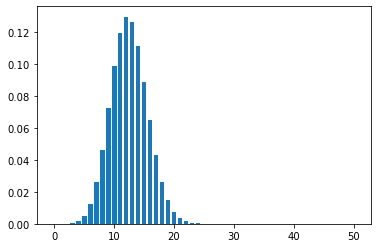

In [7]:
# Coin flips
p_heads = .25 # unfair coin
n_flips = 50

coin_distn = stats.binom(n_flips, p_heads)
possible_heads = list(range(51)) # our random variable
plt.bar(possible_heads, coin_distn.pmf(possible_heads))

<BarContainer object of 7 artists>

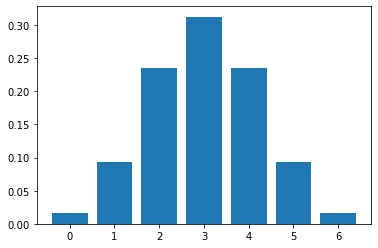

In [8]:
# Siblings
p_daughter = .5
n_kids = 6
daughter_distn = stats.binom(n_kids, p_daughter)

possible_daughters = list(range(7))
plt.bar(possible_daughters, daughter_distn.pmf(possible_daughters))

In [9]:
# Polling numbers, likelihood fn

<a id='likelihood'></a>
## The Binomial likelihood
---

The likelihood represents the probability of observing $k$ successes out of $n$ trials _given a probability of success $p$._

This $p$ can be fixed, say at $p = 0.3$, in which case we would evaluate the likelihood at exactly that point. We could also represent $p$ as a distribution over the range of possible $p$ values. Evaluating the likelihood at all of our different "hypotheses" about what $p$ could be. 

In [10]:
# Plot binom likelihood for our data

<a id='mle'></a>
## The "Maximum Likelihood Estimate" for $p$
---

If we were to _just_ focus on the likelihood part of Bayes Theorem, we could ask "what is the value of the parameter $p$ that maximizes the value of the likelihood function?" This is precisely what we do in Frequentist statistics to find our point estimate of a parameter. 

Remember that Frequentists have no interest in the prior or posterior beliefs about the probability of the parameter's value. Frequentists state that there is no probability associated with a parameter. 

Because we only take a sample of people, we may by chance measure a percentage of votes for our candidate that deviates from that true probability to some degree. Remember: in Frequentist statistics, it is the data that has a probability rather than the parameter!

**For the Binomial distribution, we can easily calculate the value for $p$ that makes our observed data the most likely: it is going to be the fraction of survey responses in favor of our candidate, divided by the total responses.**

In [11]:
# mle

<a id='beta-conjugate'></a>
## Putting it all together: the Beta as a "conjugate prior" to the Binomial likelihood
---

Let's recap what we've done up to this point:
1. We're trying to understand $p$: The proportion of votes our candidate will win
2. We created a beta distribution $f(p)$ to represent our prior beliefs about $p$
3. We've gathered survey data, and calculated the value for $p$ that maximizes the likelihood of the surveys we've observed.

Like our prior, our posterior distribution $f(p|n,k)$ will be a beta distribution as well. Because our likelihood function is binomial, creating the parameters $\alpha_{posterior}$ and $\beta_{posterior}$ for our beta distribution is a matter of simple addition:

### $$ \begin{aligned}
\alpha_{posterior} &= k + \alpha_{prior} \\
\beta_{posterior} &= n - k + \beta_{prior}
\end{aligned} $$


In [12]:
# Create alpha and beta posteriors

In [13]:
# Posterior dist'n

## Conjugacy
---

Our prior and likelihood play nicely together because of one word: conjugacy. **Conjugacy** and "conjugate priors" are important concepts in Bayesian statistics. 

> The essential idea is that the *posterior* distribution is guaranteed to have the same mathematical form as the *prior* distribution when the prior distribution is a conjugate prior to the likelihood function.

There are [many conjugate priors and posteriors](https://en.wikipedia.org/wiki/Conjugate_prior#Table_of_conjugate_distributions). They are extremely useful because they make the prior-posterior update algebraically solvable. When there is no conjugate prior, sampling techniques such as Markov Chain Monte Carlo are often necessary.

This lecture covers the most classic conjugate prior scenario: the Beta-Binomial model. Binomial models are appropriate for binary events. The prior distribution on the probability of a binary event is a Beta distribution. As it turns out, the Beta distribution is conjugate to the Binomial likelihood and we are guaranteed to get out a posterior distribution that is also a Beta distribution.

In [14]:
# Plot posterior distribution

## What is the PROBABILITY that Biden wins?
---

Recall that $p$ is the **percentage of votes** we think Biden will receive. Now that we have a posterior distribution, we can answer our second question:

**What is the PROBABILITY that Biden wins?**

Note that FiveThirtyEight answered this question by running 40,000 simulations. We can do the same!

In [15]:
# Create simulations

## Conclusion
---

Our results are vastly different than FiveThirtyEight's (73%). 

What might explain the disparity?